<a href="https://colab.research.google.com/github/AkshayBhansali18/Fastai/blob/master/teddy_bear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
classes=['teddybear','brownbear','blackbear']

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_path = 'gdrive/My Drive/fastai/fastai/lesson2'

In [0]:
data=ImageDataBunch.from_folder("/content/drive/My Drive/fastai/fastai/lesson2",train='.',valid_pct=0.2,num_workers=4,size=224).normalize(imagenet_stats)

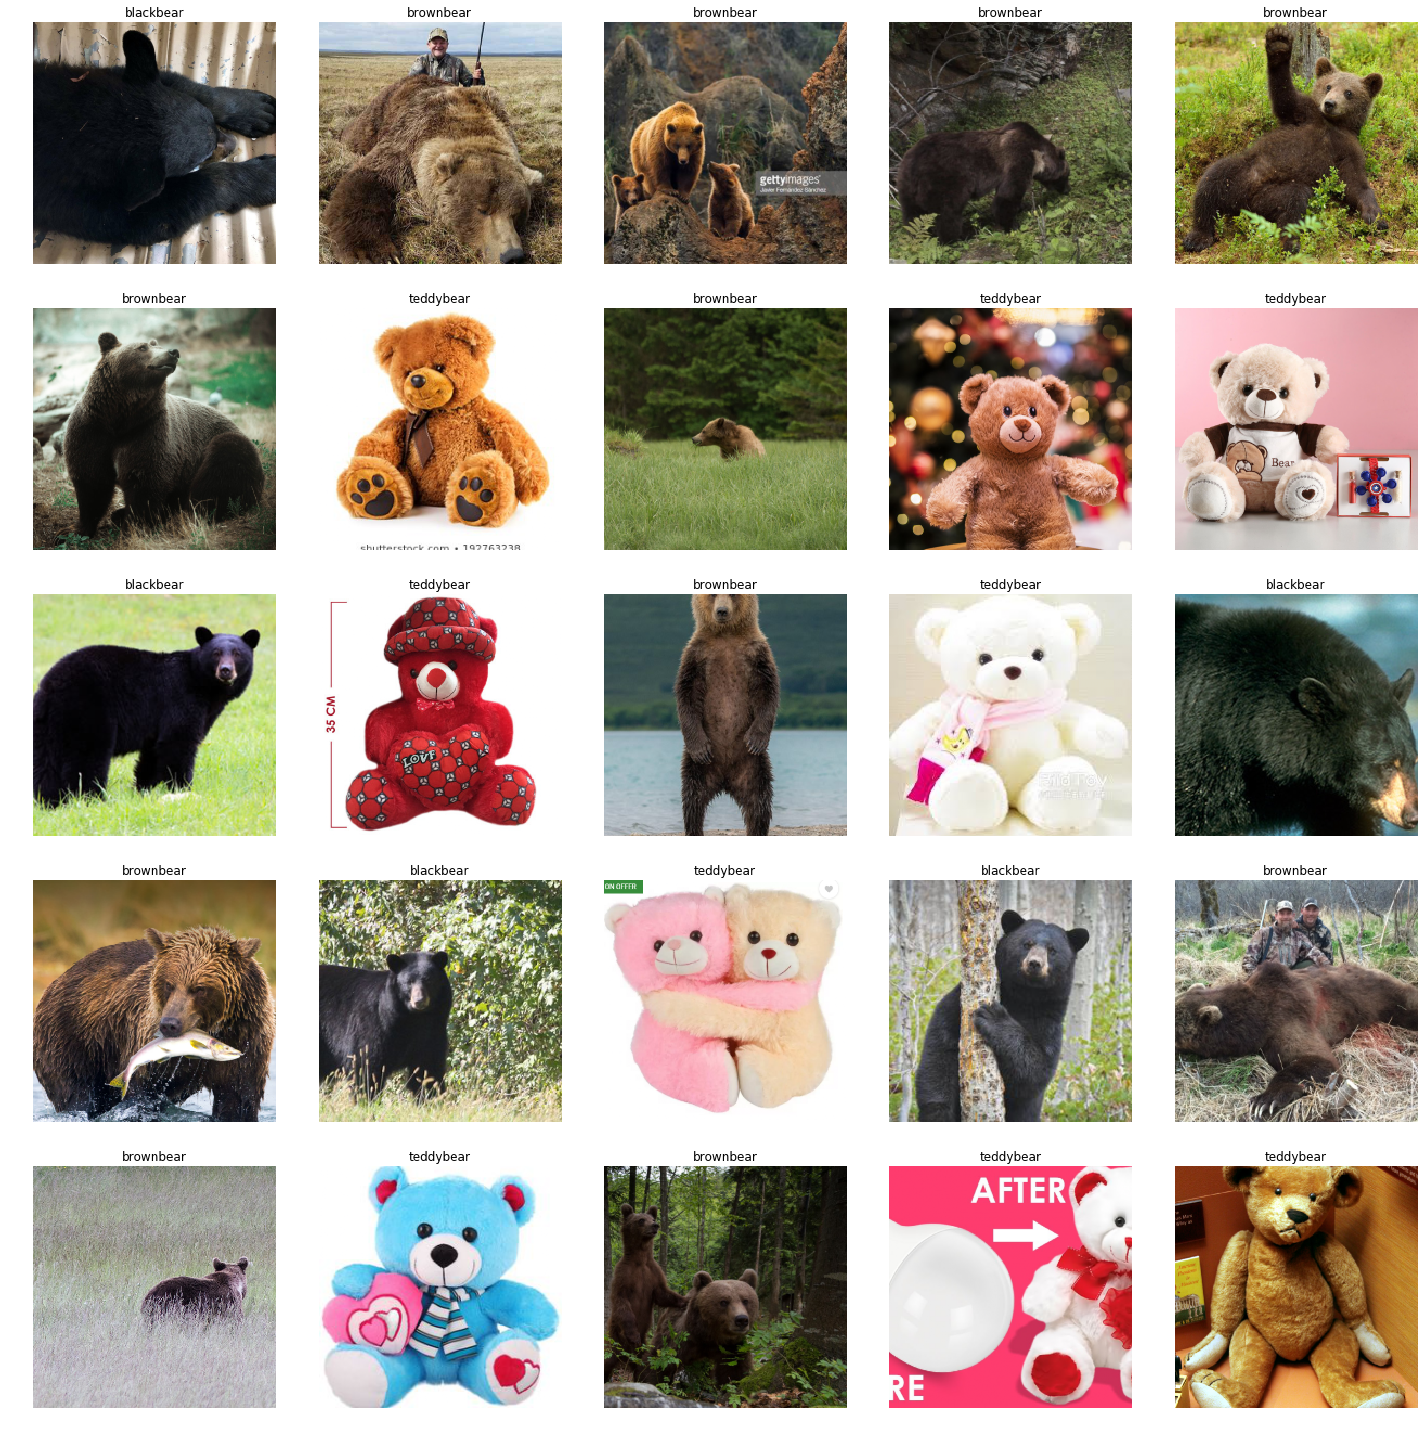

In [0]:
data.show_batch(rows=5)


In [0]:
data.classes

['blackbear', 'brownbear', 'teddybear']

**Training Model**

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 24966591.12it/s]


In [0]:
learn.fit_one_cycle(4)

In [0]:
inter=ClassificationInterpretation.from_learner(learn)

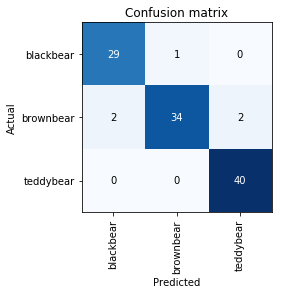

In [0]:
inter.plot_confusion_matrix()

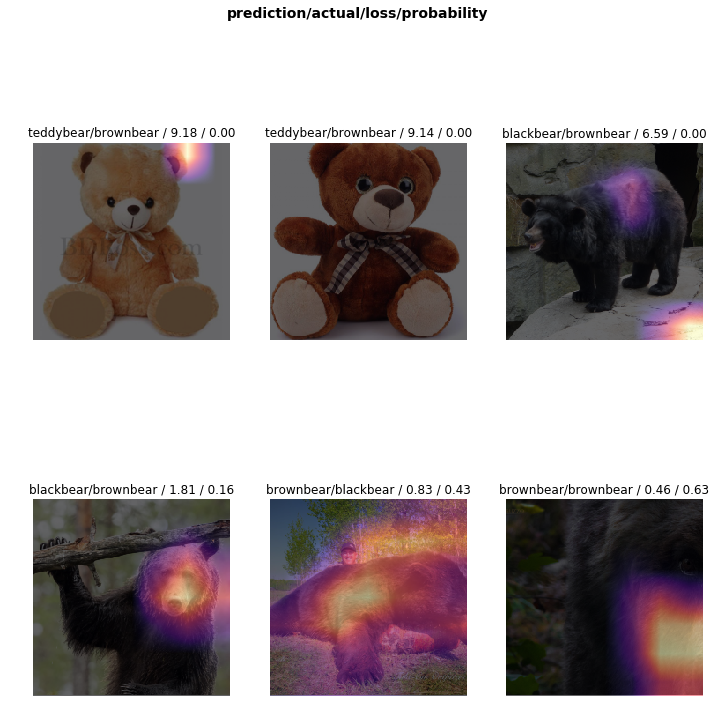

In [0]:
inter.plot_top_losses(6)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


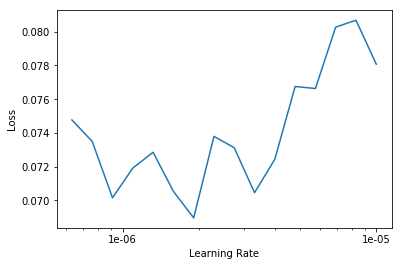

In [0]:
learn.recorder.plot()

In [0]:
learn.save('stage1')

In [0]:
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (436 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
blackbear,blackbear,blackbear,blackbear,blackbear
Path: /content/drive/My Drive/fastai/fastai/lesson2;

Valid: LabelList (108 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
blackbear,blackbear,brownbear,brownbear,teddybear
Path: /content/drive/My Drive/fastai/fastai/lesson2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd